### To try to improve accuracy we will 
1. reintroduce column 42
2. specialize (dos specific, etc.)

In [3]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import sklearn
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)

In [5]:
traindata = pd.read_csv('NSL-KDD/KDDTrain+.csv', header=None)
# attack_dict = {
#     'normal': 'normal',
    
#     'back': 'DoS',
#     'land': 'DoS',
#     'neptune': 'DoS',
#     'pod': 'DoS',
#     'smurf': 'DoS',
#     'teardrop': 'DoS',
#     'mailbomb': 'DoS',
#     'apache2': 'DoS',
#     'processtable': 'DoS',
#     'udpstorm': 'DoS',
# }

In [17]:
traindata[41].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back', 'guess_passwd',
       'ftp_write', 'multihop', 'rootkit', 'buffer_overflow', 'imap',
       'warezmaster', 'phf', 'land', 'loadmodule', 'spy', 'perl'], dtype=object)

In [18]:
attack_dict = {}
for a in traindata[41].unique():
    attack_dict[a] = False
attack_dict

{'back': False,
 'buffer_overflow': False,
 'ftp_write': False,
 'guess_passwd': False,
 'imap': False,
 'ipsweep': False,
 'land': False,
 'loadmodule': False,
 'multihop': False,
 'neptune': False,
 'nmap': False,
 'normal': False,
 'perl': False,
 'phf': False,
 'pod': False,
 'portsweep': False,
 'rootkit': False,
 'satan': False,
 'smurf': False,
 'spy': False,
 'teardrop': False,
 'warezclient': False,
 'warezmaster': False}

In [19]:
attack_dict['normal'] = True
attack_dict['back'] = True
attack_dict['land'] = True
attack_dict['neptune'] = True
attack_dict['pod'] = True
attack_dict['smurf'] = True
attack_dict['teardrop'] = True
attack_dict['mailbomb'] = True
attack_dict['apache2'] = True
attack_dict['processtable'] = True
attack_dict['udpstorm'] = True

In [20]:
attack_dict

{'apache2': True,
 'back': True,
 'buffer_overflow': False,
 'ftp_write': False,
 'guess_passwd': False,
 'imap': False,
 'ipsweep': False,
 'land': True,
 'loadmodule': False,
 'mailbomb': True,
 'multihop': False,
 'neptune': True,
 'nmap': False,
 'normal': True,
 'perl': False,
 'phf': False,
 'pod': True,
 'portsweep': False,
 'processtable': True,
 'rootkit': False,
 'satan': False,
 'smurf': True,
 'spy': False,
 'teardrop': True,
 'udpstorm': True,
 'warezclient': False,
 'warezmaster': False}

In [34]:
a_list = [key for key, value in attack_dict.items() if attack_dict[key] == True]
a = traindata[traindata[41].isin(a_list)]

## Now we have our dataset with only normal and DOS labels

In [40]:
a.groupby(41).size()

41
back          956
land           18
neptune     41214
normal      67343
pod           201
smurf        2646
teardrop      892
dtype: int64

In [42]:
train = a.drop(42, axis=1)
protocol_map = dict(zip(train[1].unique(), range(len(train[1].unique()))))
service_map = dict(zip(train[2].unique(), range(len(train[2].unique()))))
flag_map = dict(zip(train[3].unique(), range(len(train[3].unique()))))

# replace features
train = train.replace(flag_map)
train = train.replace(protocol_map)
train = train.replace(service_map)

# replace the labels
label_map = dict(zip(train[41].unique(), range(len(train[41].unique()))))
train = train.replace(label_map)

In [43]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,0,0,0,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,1,1,0,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,0,2,1,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,0,3,0,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,0,3,0,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


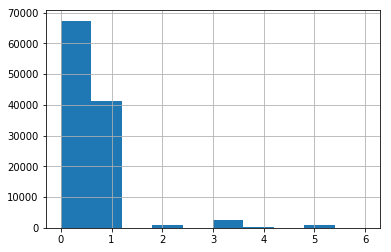

In [45]:
train[41].hist()

In [47]:
X = train.iloc[:,0:41]
Y_train = train.iloc[:,41]
scaler = Normalizer().fit(X)
X_train = scaler.transform(X)
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [48]:
testdata = pd.read_csv('NSL-KDD/KDDTest+.csv', header=None)
testdata = testdata[testdata[41].isin(a_list)]

In [49]:
testdata.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
5,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21
6,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.11,0.72,0.00,0.00,0.00,0.0,0.72,0.04,normal,21


In [56]:
test = testdata.drop(42, axis=1)
protocol_map = dict(zip(test[1].unique(), range(len(test[1].unique()))))
service_map = dict(zip(test[2].unique(), range(len(test[2].unique()))))
flag_map = dict(zip(test[3].unique(), range(len(test[3].unique()))))

# replace features
test = test.replace(flag_map)
test = test.replace(protocol_map)
test = test.replace(service_map)

# replace the labels
label_map = dict(zip(test[41].unique(), range(len(test[41].unique()))))
test = test.replace(label_map)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,0,0,0,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,0
2,2,0,1,1,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,1
5,0,0,2,1,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,1
6,0,0,3,1,1022,387,0,0,0,0,...,28,0.11,0.72,0.00,0.00,0.00,0.0,0.72,0.04,1


In [57]:
X = test.iloc[:,0:41]
Y_test = test.iloc[:,41]
scaler = Normalizer().fit(X)
X_test = scaler.transform(X)
predicted = model.predict(X_test)
accuracy_score(Y_test, predicted)

0.0048928238583410997

In [58]:
model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
accuracy_score(Y_test, predicted)

0.0179403541472507

In [68]:
#binary_map = dict(zip(train[1].unique(), range(len(train[1].unique()))))
train = traindata.drop(42, axis=1)
protocol_map = dict(zip(train[1].unique(), range(len(train[1].unique()))))
service_map = dict(zip(train[2].unique(), range(len(train[2].unique()))))
flag_map = dict(zip(train[3].unique(), range(len(train[3].unique()))))

# replace features
train = train.replace(flag_map)
train = train.replace(protocol_map)
train = train.replace(service_map)

train.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,0,0,0,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,1,1,0,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,0,2,1,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,0,3,0,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,0,3,0,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [72]:
binary_dict = {}
for a in train[41].unique():
    binary_dict[a] = 0 if a == 'normal' else 1
    
train = train.replace(binary_dict)

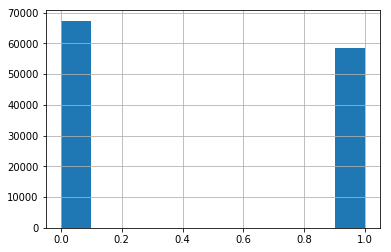

In [73]:
train[41].hist()

In [74]:
X = train.iloc[:,0:41]
Y_train = train.iloc[:,41]
scaler = Normalizer().fit(X)
X_train = scaler.transform(X)
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [82]:
test = testdata.drop(42, axis=1)
protocol_map = dict(zip(test[1].unique(), range(len(test[1].unique()))))
service_map = dict(zip(test[2].unique(), range(len(test[2].unique()))))
flag_map = dict(zip(test[3].unique(), range(len(test[3].unique()))))

# replace features
test = test.replace(flag_map)
test = test.replace(protocol_map)
test = test.replace(service_map)

binary_dict = {}
for a in test[41].unique():
    binary_dict[a] = 0 if a == 'normal' else 1
    
test = test.replace(binary_dict)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,0,0,0,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1
2,2,0,1,1,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0
5,0,0,2,1,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,0
6,0,0,3,1,1022,387,0,0,0,0,...,28,0.11,0.72,0.00,0.00,0.00,0.0,0.72,0.04,0


In [83]:
test[41].unique()

array([1, 0])

In [84]:
X = test.iloc[:,0:41]
Y_test = test.iloc[:,41]
scaler = Normalizer().fit(X)
X_test = scaler.transform(X)
predicted = model.predict(X_test)
accuracy_score(Y_test, predicted)

0.80207362534948745

In [85]:
model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
accuracy_score(Y_test, predicted)

0.88775629077353213